# Example - 32 - Deep Space 2 - Mars

In [1]:
from AMAT.planet import Planet
from AMAT.vehicle import Vehicle

In [2]:
import numpy as np
import matplotlib.pyplot as plt

This notebook simulates the atmospheric entry of the Deep Space 2 aeroshells.
https://en.wikipedia.org/wiki/Deep_Space_2

In [3]:
# Set up the planet and atmosphere model.
planet=Planet("MARS")  
planet.h_skip = 128.0E3
planet.loadAtmosphereModel('../atmdata/Mars/mars-gram-avg.dat', 0 , 1 , 2, 3)

In [4]:
# Set up the vehicle
vehicle=Vehicle('DS2', 3.67, 36.2, 0.00, 0.096, 0.0, 0.0875, planet)

In [5]:
# Set up entry parameters
vehicle.setInitialState(128.0,0.0,0.0,6.90,0.0,-13.25,0.0,0.0)

In [6]:
# Set up solver
vehicle.setSolverParams(1E-6)

In [7]:
# Propogate vehicle entry trajectory
vehicle.propogateEntry (30*60.0,0.1,0.0)

In [8]:
# import rcParams to set figure font type
from matplotlib import rcParams

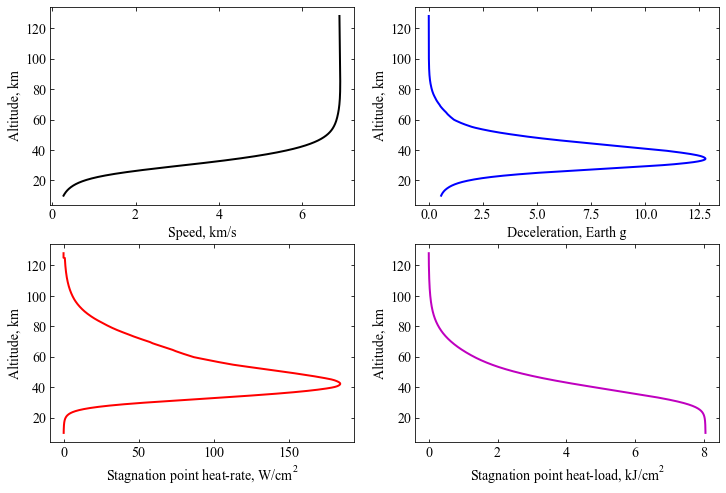

In [9]:
fig = plt.figure(figsize=(12,8))
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

plt.subplot(2, 2, 1)
plt.plot(vehicle.v_kmsc, vehicle.h_kmc, 'k-', linewidth=2.0)
plt.xlabel('Speed, km/s',fontsize=14)
plt.ylabel('Altitude, km', fontsize=14)
ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=14)
ax.tick_params(axis='y',labelsize=14)

plt.subplot(2, 2, 2)
plt.plot(vehicle.acc_net_g, vehicle.h_kmc, 'b-', linewidth=2.0)
plt.xlabel('Deceleration, Earth g',fontsize=14)
plt.ylabel('Altitude, km', fontsize=14)
ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=14)
ax.tick_params(axis='y',labelsize=14)

plt.subplot(2, 2, 3)
plt.plot(vehicle.q_stag_total, vehicle.h_kmc,'r-', linewidth=2.0)
plt.xlabel('Stagnation point heat-rate, '+r'$W/cm^2$',fontsize=14)
plt.ylabel('Altitude, km', fontsize=14)
ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=14)
ax.tick_params(axis='y',labelsize=14)


plt.subplot(2, 2, 4)
plt.plot(vehicle.heatload/1.0E3, vehicle.h_kmc, 'm-', linewidth=2.0)
plt.xlabel('Stagnation point heat-load, '+r'$kJ/cm^2$',fontsize=14)
plt.ylabel('Altitude, km', fontsize=14)
ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=14)
ax.tick_params(axis='y',labelsize=14)

plt.savefig('../plots/deep-space-2-mars.png',bbox_inches='tight')
plt.savefig('../plots/deep-space-2-mars.pdf', dpi=300,bbox_inches='tight')
plt.savefig('../plots/deep-space-2-mars.eps', dpi=300,bbox_inches='tight')

plt.show()